In [1]:
import f110_gym
import f110_orl_dataset
import gymnasium as gym
# import gymnasium as gym

In [2]:
import importlib
# reimport f110_or_dataset
import gymnasium as gym
importlib.reload(gym)
importlib.reload(f110_orl_dataset)

/home/fabian/miniconda3/envs/f110_sb3/lib/python3.8/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment f110_with_dataset-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'f110_orl_dataset' from '/home/fabian/f110_rl/f110-sb3/f1tenth_orl_dataset/f110_orl_dataset/__init__.py'>

In [3]:
F110Env = gym.make('f110_with_dataset-v0',
    # only terminals are available as of tight now 
        **dict(name='f110_with_dataset-v0',
            config = dict(map="Infsaal", num_agents=1),
              render_mode="human")
    )     

{'config': {'map': 'Infsaal', 'num_agents': 1}, 'render_mode': 'human'}
Infsaal_map.pgm
Infsaal_map.pgm
hi
Infsaal_map.pgm


/home/fabian/f110_rl/f110-sb3/f1tenth_gym/gym/f110_gym/envs/integrator.py:13: UserWarning: Chosen integrator is RK4. This is different from previous versions of the gym.
  warnings.warn(


Infsaal_map.pgm
===
Box([[-0.4189 -5.    ]], [[ 0.4189 20.    ]], (1, 2), float32)
low
20
hi
Dict('ang_vels_z': Box(-20.0, 20.0, (1,), float32), 'lidar_occupancy': Box(0.0, 1.0, (54,), float32), 'linear_vels_x': Box(-20.0, -6.2831855, (1,), float32), 'linear_vels_y': Box(-20.0, -6.2831855, (1,), float32), 'poses_theta': Box(-6.2831855, 6.2831855, (1,), float32), 'poses_x': Box(-30.0, 30.0, (1,), float32), 'poses_y': Box(-30.0, 30.0, (1,), float32), 'previous_action': Box([[-0.4189  0.7   ]], [[0.4189 2.    ]], (1, 2), float32), 'progress': Box(0.0, 1.0, (1,), float32))


/home/fabian/miniconda3/envs/f110_sb3/lib/python3.8/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [39]:
tr = F110Env.get_dataset(zarr_path="/mnt/hdd2/fabian/f1tenth_dope/ws_ope/f1tenth_orl_dataset/data/trajectories.zarr")
print(tr["observations"].shape)
print(tr["scans"][0])

/mnt/hdd2/fabian/f1tenth_dope/ws_ope/f1tenth_orl_dataset/data/trajectories.zarr
['min_action' 'td_progress']
(100734, 9)
[0.15058511 0.12904134 0.10762525 0.09856763 0.09552209 0.09225084
 0.08216818 0.08373918 0.08213844 0.06991579 0.07501718 0.07852967
 0.10094032 0.87449753 0.8711384  0.8948046  0.76805127 0.630991
 0.4987503  0.4014295  0.33226714 0.29135543 0.26545042 0.24400651
 0.227234   0.2081823  0.19532226 0.19364844 0.18468425 0.18145208
 0.17457655 0.17241251 0.17301331 0.17422196 0.17996682 0.1794346
 0.18960883 0.19697708 0.2079021  0.21536756 0.22986087 0.24830255
 0.2504682  0.23222694 0.21545574 0.20511213 0.19915743 0.1879758
 0.18973118 0.18665892 0.18980592 0.18425575 0.18880688 0.19372262]


In [11]:
print(tr.keys())

dict_keys(['rewards', 'terminals', 'timeouts', 'actions', 'index', 'observations', 'scans', 'infos'])


In [12]:
print(tr["timestep"][-1])
print(len(tr["timestep"]))

KeyError: 'timestep'

In [ ]:
print(len(tr))

6


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:

plt.plot(tr["rewards"])
plt.show()

NameError: name 'plt' is not defined

In [12]:
def compute_returns(input):
    discount = 0.99
    discounted_returns = []
    for episode in tr:
        discounted_return = 0
        # with numpy
        discounted_return = np.sum(discount**np.arange(len(input["rewards"])) * input["rewards"])
        discounted_returns.append(discounted_return)
    return discounted_returns

In [13]:
# mean returns
returns = compute_returns(tr)

TypeError: list indices must be integers or slices, not str

In [38]:
rew = tr[71]["rewards"]

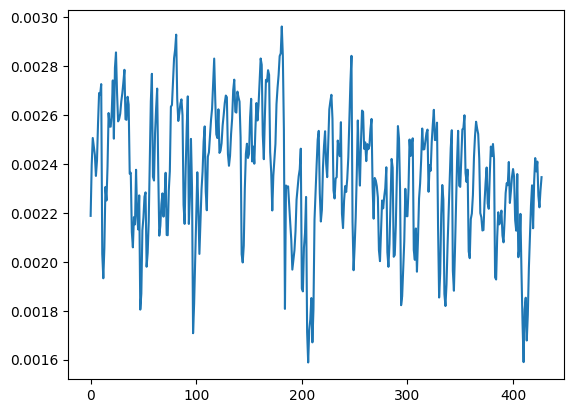

In [42]:
# plot rew
plt.plot(rew)

In [41]:
print(max(rew))
new = np.array([0.25] * len(rew))
print(compute_returns(new))

0.0029626671180267294
[24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.661309280683653, 24.66130928068365

In [30]:
print(discounted_returns)
print(max(discounted_returns))
# get argmax
print(np.argmax(discounted_returns))

[0.22419001889782492, 0.2291014891632704, 0.22758558787760497, 0.2284173734873712, 0.2183412345028362, 0.21978473976496313, 0.22320209044479186, 0.2285211108079324, 0.2317357281157974, 0.22622165801609218, 0.22689239671125794, 0.22982876556357756, 0.22729069805716126, 0.22354296990281103, 0.23168873999838077, 0.22733039864964572, 0.23253886185382017, 0.2254798480090844, 0.22970073358748574, 0.22454940092929299, 0.23083942500687551, 0.23763101238456397, 0.23058275444134993, 0.22671012368892896, 0.22759151356262378, 0.23260185810091158, 0.22936873480812486, 0.22509136902697388, 0.22994225734100077, 0.23273171021031197, 0.23290557102899098, 0.22886693703089184, 0.22924247885298507, 0.2264710881794249, 0.2243375559266521, 0.22987019727607622, 0.22194722562799096, 0.23116192719120532, 0.228334902824646, 0.22790574039458725, 0.23020537830449625, 0.231006450374601, 0.2322731066201018, 0.22772761019037313, 0.2310035220122918, 0.2315576326943134, 0.21978619895332407, 0.23338387301045205, 0.2187

In [15]:
# print mean and variance of discounted returns
print("mean and variance of discounted returns")
print(np.mean(discounted_returns))
print(np.var(discounted_returns))

mean and variance of discounted returns
21.138507718097383
1.9556561830439847


In [10]:
plt.plot(tr["rewards"])

TypeError: list indices must be integers or slices, not str

In [13]:
tr[0]["observations"].shape

(6, 435)

In [5]:
from f110_gym.envs.laser_models import ScanSimulator2D, check_ttc_jit, ray_cast

In [11]:
import numpy as np

In [25]:
# state is [x, y, steer_angle, vel, yaw_angle, yaw_rate, slip_angle]
state = np.array([[1.2, 5.0, 0.0, 0.0, 1.0, 0.0], [1.2, 5.0, 0.0, 0.0, 1.0, 0.0]])
scan = F110Env.sim.agents[0].scan_simulator.scan(np.array([1.2,5.0,1.0]),None)

In [57]:
print(tr["observations"][0:10].shape)
print(tr["obs_keys"][0:6])
print(tr["observations"].shape)
print(tr["observations"][1])
xy = tr["observations"][0:10, -2:]#[-2:]
print(xy)
theta = tr["observations"][0:10,-3]
# add dimension -1 to theta
theta = np.expand_dims(theta, axis=-1)
print(theta)
print(theta.shape)
print(xy.shape)
joined = np.hstack((xy, theta))
print(joined)

(10, 6)
['ang_vels_z' 'linear_vel_x' 'linear_vel_y' 'pose_theta' 'pose_x' 'pose_y']
(40895, 6)
[0.06851754 0.17578745 0.         1.00095689 1.20233607 5.00364065]
[[1.20001781 5.00002766]
 [1.20233607 5.00364065]
 [1.20988345 5.0155282 ]
 [1.22125268 5.0340395 ]
 [1.23421669 5.05907965]
 [1.24877167 5.08976269]
 [1.26334405 5.12578487]
 [1.27552319 5.16462326]
 [1.28915    5.20561981]
 [1.3053534  5.24621058]]
[[1.        ]
 [1.00095689]
 [1.01040018]
 [1.02811468]
 [1.04041481]
 [1.05728149]
 [1.08621335]
 [1.12724793]
 [1.15346038]
 [1.1592865 ]]
(10, 1)
(10, 2)
[[1.20001781 5.00002766 1.        ]
 [1.20233607 5.00364065 1.00095689]
 [1.20988345 5.0155282  1.01040018]
 [1.22125268 5.0340395  1.02811468]
 [1.23421669 5.05907965 1.04041481]
 [1.24877167 5.08976269 1.05728149]
 [1.26334405 5.12578487 1.08621335]
 [1.27552319 5.16462326 1.12724793]
 [1.28915    5.20561981 1.15346038]
 [1.3053534  5.24621058 1.1592865 ]]


(1080,)


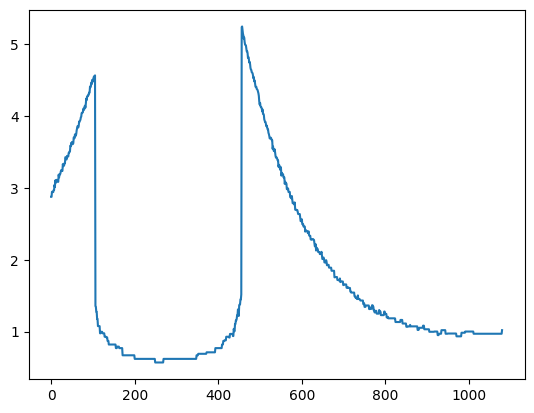

(1080,)


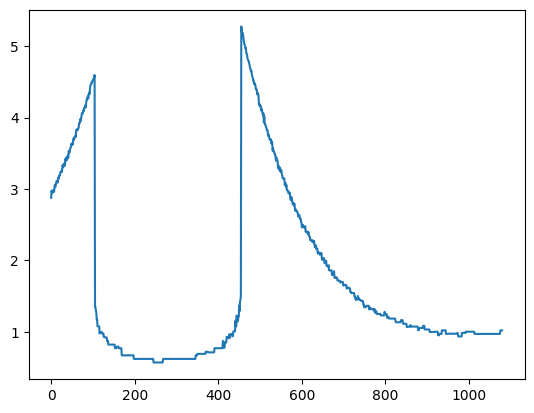

(1080,)


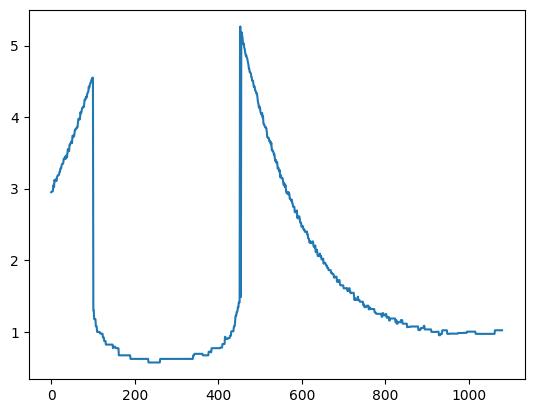

(1080,)


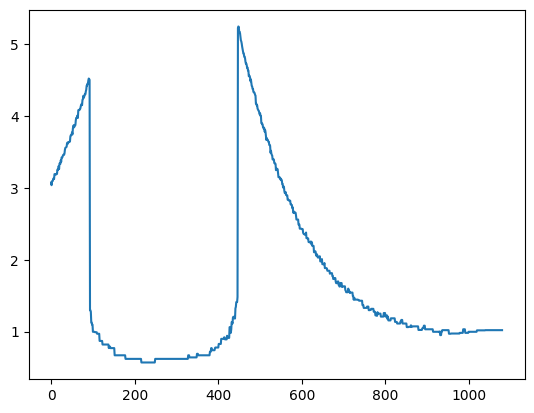

(1080,)


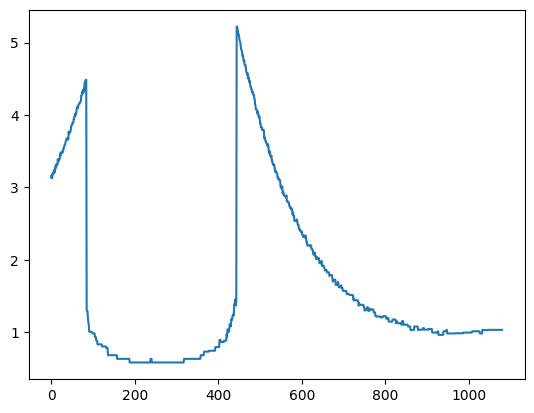

(1080,)


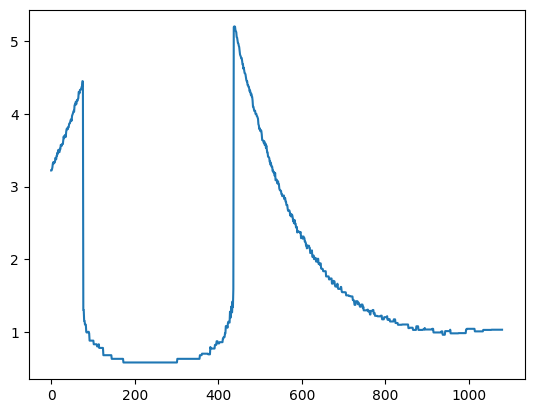

(1080,)


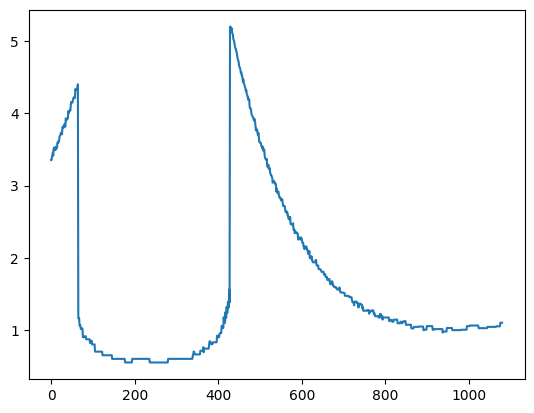

(1080,)


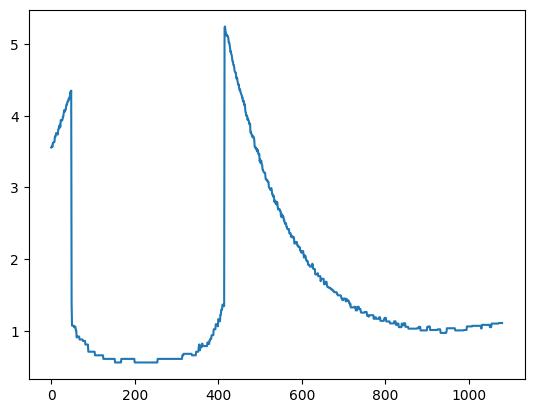

(1080,)


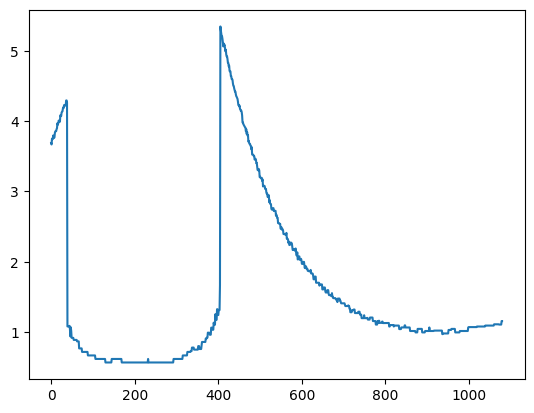

(1080,)


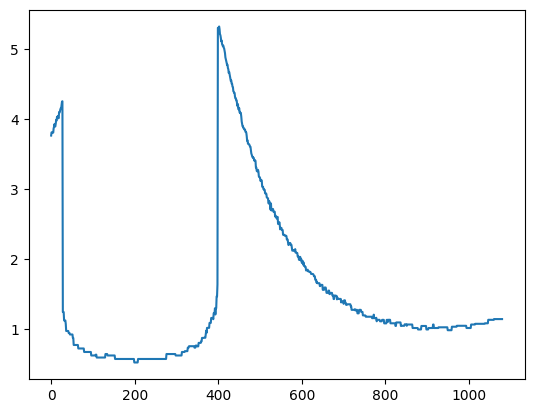

In [64]:
for pose in joined:
    scan = F110Env.sim.agents[0].scan_simulator.scan(pose,None)
    # TODO! downsample scan
    print(scan.shape)
    plt.plot(scan)
    plt.show()

In [42]:
print(joined)

[1.20233607 5.00364065 1.00095689]


In [21]:
import matplotlib.pyplot as plt

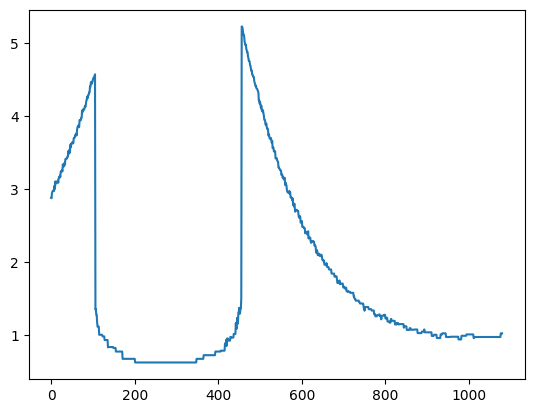

In [22]:
plt.plot(scan)